<a href="https://colab.research.google.com/github/harrisb002/CS_479/blob/Labs/lab7b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN classifier for the MNIST dataset

## Credits
Some of the material in this notebook has been taken from a Coursera Deep Learning course

### Instructions

In this notebook, you will write code to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line:

`# YOUR CODE HERE`

Don't move or edit this first line - this is what the automatic grader looks for to recognise graded cells. These cells require you to write your own code to complete them, and are automatically graded when you submit the notebook. Don't edit the function name or signature provided in these cells, otherwise the automatic grader might not function properly. Inside these graded cells, you can use any functions or classes that are imported below, but make sure you don't use any variables that are outside the scope of the function. In addition, do not use any packages that are not already loaded in this notebook


### Let's get started!

We'll start running some imports, and loading the dataset. Do not edit the existing imports in the following cell.

In [ ]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages.

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D

from tensorflow.keras.utils import plot_model



#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Print the shape of train_images and train_labels.
# YOUR CODE HERE
print(train_images.shape, train_labels.shape)

(60000, 28, 28) (60000,)


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
# Complete the following function.
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    # YOUR CODE HERE
    # Divide the images by 255 to scale the pixel values to [0, 1]
    scaled_train_images = train_images / 255.0
    scaled_test_images = test_images / 255.0

    return scaled_train_images, scaled_test_images


In [ ]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
assert scaled_test_images.dtype == 'float64'
assert scaled_train_images.min() == 0
assert scaled_train_images.max() == 1

#### Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [ ]:
# Complete the following function.
# Make sure to not change the function name or arguments.

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    # YOUR CODE HERE
    model = Sequential([
        # 2D Convolutional layer
        Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape),

        # Max pooling layer
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten layer
        Flatten(),

        # Two dense hidden layers
        Dense(units=64, activation='relu'),
        Dense(units=64, activation='relu'),

        # Dense output layer
        Dense(units=10, activation='softmax')
    ])

    return model


In [ ]:
#Get the desired input shape from our training data
desired_input_shape = scaled_train_images[0].shape

#Add a 1 to the desired input shape (or else Conv2D will complain regarding the expected dimensions)
desired_input_shape = desired_input_shape + (1,)
print(desired_input_shape)

# Run your function to get the model
model = get_model(desired_input_shape)
model.summary()

(28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                            

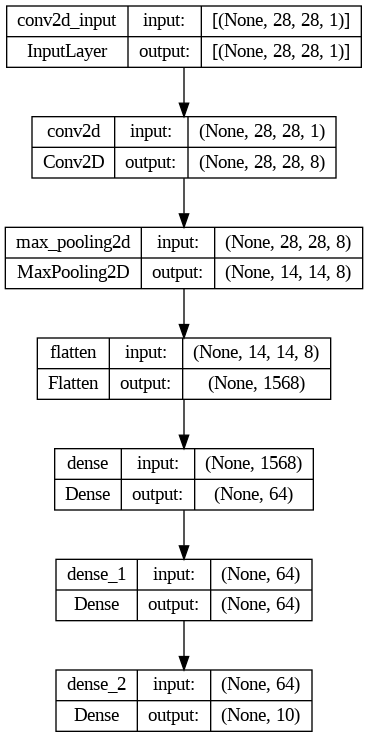

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
assert len(model.layers) == 6, "There should be total of 6 layers"
assert isinstance(model.layers[0], tf.keras.layers.Conv2D), "First layer should be a 2D Convolutional layer"
assert isinstance(model.layers[1], tf.keras.layers.MaxPooling2D), "Second layer should be a 2D Max Pooling layer"
assert isinstance(model.layers[5], tf.keras.layers.Dense), "Final layer should be a Dense layer"
assert (model.layers[2]).output_shape[1] == 1568, "Third layer has output shape (None, 1568)"

#Code to count number of parameters from https://lindevs.com/count-number-of-parameters-of-model-in-tensorflow-2
numParams_layer0 = np.sum([np.prod(v.get_shape()) for v in (model.layers[0]).trainable_weights])
numParams_layer3 = np.sum([np.prod(v.get_shape()) for v in (model.layers[3]).trainable_weights])

assert numParams_layer0 == 80, "First layer has 80 parameters"
assert numParams_layer3 == 100416, "Fourth layer has 100416 parameters"
print("All tests passed!")

All tests passed!


#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [ ]:
# Complete the following function.
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the legacy Adam optimiser (with learning rate of 0.0005), the cross-entropy loss function and
    accuracy as the only metric. (What kind of cross-entropy and accuracy would you need? "Sparse" version or not?)
    Your function doesn't need to return anything; the model will be compiled in-place.

    Note: we are using legacy adam optimizer here because the recent version of adam optimizer has known issues on Mac machines.
    Legacy optimizer can be found here: tf.keras.optimizers.legacy.Adam
    """
    # YOUR CODE HERE
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0005), loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['sparse_categorical_accuracy'])

In [ ]:
# Run your function to compile the model
compile_model(model)

In [ ]:
assert isinstance(model.loss, tf.keras.losses.SparseCategoricalCrossentropy), "Loss should be of type SparseCategoricalCrossentropy"
assert isinstance(model.optimizer, tf.keras.optimizers.legacy.Adam), "Optimizer should be of type legacy Adam"

lr = model.optimizer.learning_rate.numpy()
assert lr == np.float32(0.0005), f"Learning rate of Adam optimizer should be 0.0005 but got {lr}"
print("All tests passed!")

All tests passed!


#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, batch size to 200, and return the training history to be used for plotting the learning curves.

In [ ]:
# Complete the following function.
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels.
    It should provide a batch size of 200
    Your function should return the training history, as returned by model.fit.
    """
    # YOUR CODE HERE
    history = model.fit(scaled_train_images, train_labels, epochs=5, batch_size=200)
    return history

In [ ]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
300/300 [==============================] - 24s 72ms/step - loss: 0.5174 - sparse_categorical_accuracy: 0.8584
Epoch 2/5
300/300 [==============================] - 15s 51ms/step - loss: 0.1589 - sparse_categorical_accuracy: 0.9540
Epoch 3/5
300/300 [==============================] - 16s 54ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9679
Epoch 4/5
300/300 [==============================] - 15s 50ms/step - loss: 0.0884 - sparse_categorical_accuracy: 0.9740
Epoch 5/5
300/300 [==============================] - 15s 50ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9780


In [ ]:
#After fitting metric names can be printed
print("Metric names are: ", model.metrics_names)

Metric names are:  ['loss', 'sparse_categorical_accuracy']


In [ ]:
#print information stored in the history object
print(history.params)
print(history.model)
#history.history is a dictionary with 2 keys in this case, 'loss', and 'sparse_categorical_accuracy'
print(history.history)

{'verbose': 1, 'epochs': 5, 'steps': 300}
{'loss': [0.5174223184585571, 0.15887296199798584, 0.11167695373296738, 0.08839866518974304, 0.0739387795329094], 'sparse_categorical_accuracy': [0.8583833575248718, 0.9540333151817322, 0.9678999781608582, 0.9739833474159241, 0.9779833555221558]}


In [ ]:
stepsPerEpoch = history.params['steps']
batchSize = 200

#The number of iterations (or steps) per epoch should be equal to size of training set / batch size
nIterations = scaled_train_images.shape[0] / batchSize

assert stepsPerEpoch == nIterations, f"Got number of steps: {stepsPerEpoch} but should be {nIterations}"
print("All tests passed!")

All tests passed!


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)
frame.head()

,loss,sparse_categorical_accuracy
0,0.517422,0.858383
1,0.158873,0.954033
2,0.111677,0.967900
3,0.088399,0.973983
4,0.073939,0.977983


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

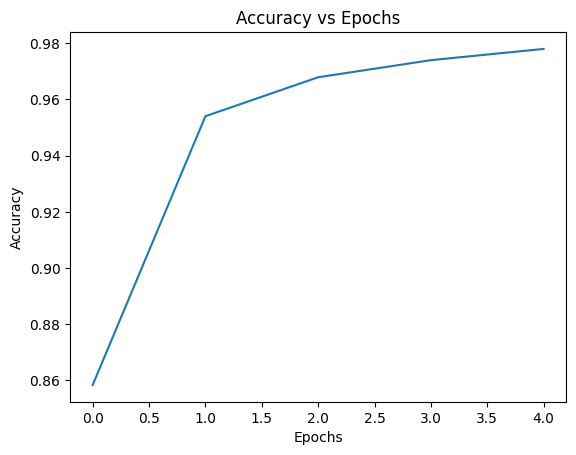

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

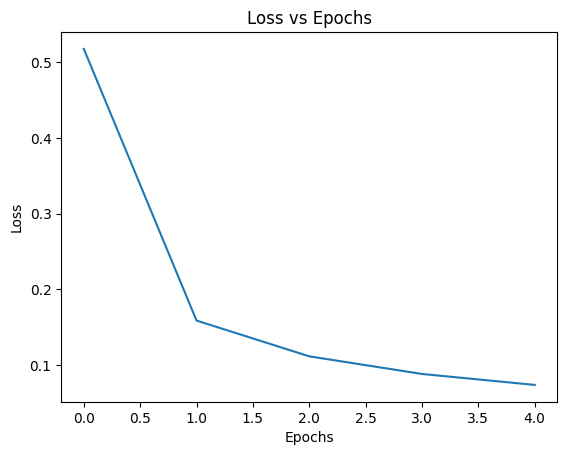

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:

# Complete the following function.
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels.
    Your function should return a tuple (test_loss, test_accuracy).
    """
    # YOUR CODE HERE
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=0)
    return (test_loss, test_accuracy)


In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.07001089304685593
Test accuracy: 0.9771000146865845


In [ ]:
#if network was configured correctly, you should receive accuracy greater than 90% (and typically as much as 95%)

assert test_accuracy > 0.90, "Accuracy should be greater than 90%"
print("All tests passed!")

All tests passed!


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

In [ ]:
# Run this cell to get a set of randomly selected test images

num_test_images = scaled_test_images.shape[0]
random_inx = np.random.choice(num_test_images, 4)

random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

print(random_inx)
print(random_inx.shape)


[3194 7390 6582 6694]
(4,)


#### Predict on some images

Compute and return the prediction on a specific set of images by calling the model's `predict` method.

In [ ]:
# Complete the following function.
# Make sure to not change the function name or arguments.

def predict_from_model(model, test_images):
    """
    This function should find the output of the model on the test_images.
    Your function should return the predictions.
    """
    # YOUR CODE HERE
    predictions = model.predict(test_images)
    return predictions

In [ ]:
# Run this cell to get model predictions on randomly selected test images.
predictions = predict_from_model(model, random_test_images)

1/1 [==============================] - 0s 128ms/step


In [ ]:
#Each of the 4 images produces an output of 10 probabilities, giving output shape of (4, 10)
assert(predictions.shape == (4, 10))

# Plot the output of the `softmax` function on each random test image

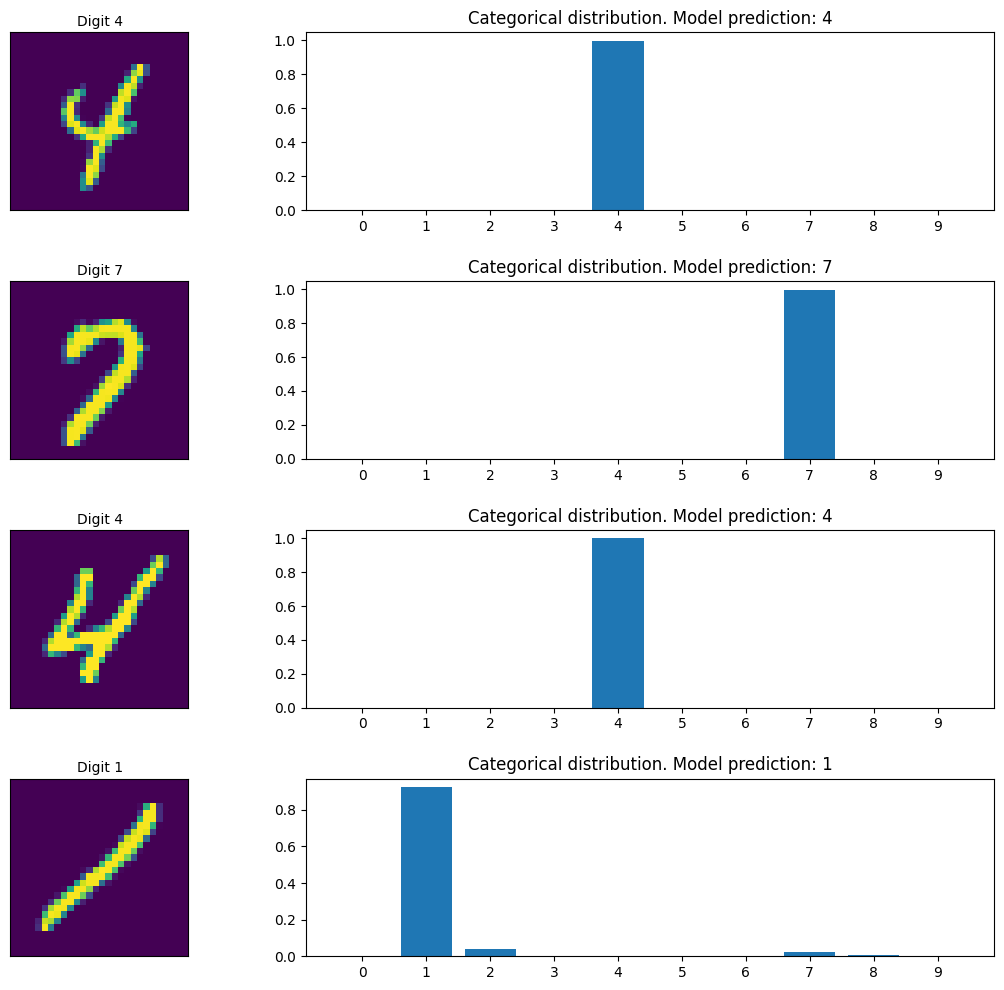

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, gt_label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {gt_label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()

Repeat the above process: Select a different set of **5** randomly chosen images and plot the categorical distribution. **IMPORTANT**: Set the random seed to `42`. Your random images and labels must be stored in variables `random_test_images` and `random_test_labels`.

1/1 [==============================] - 0s 87ms/step


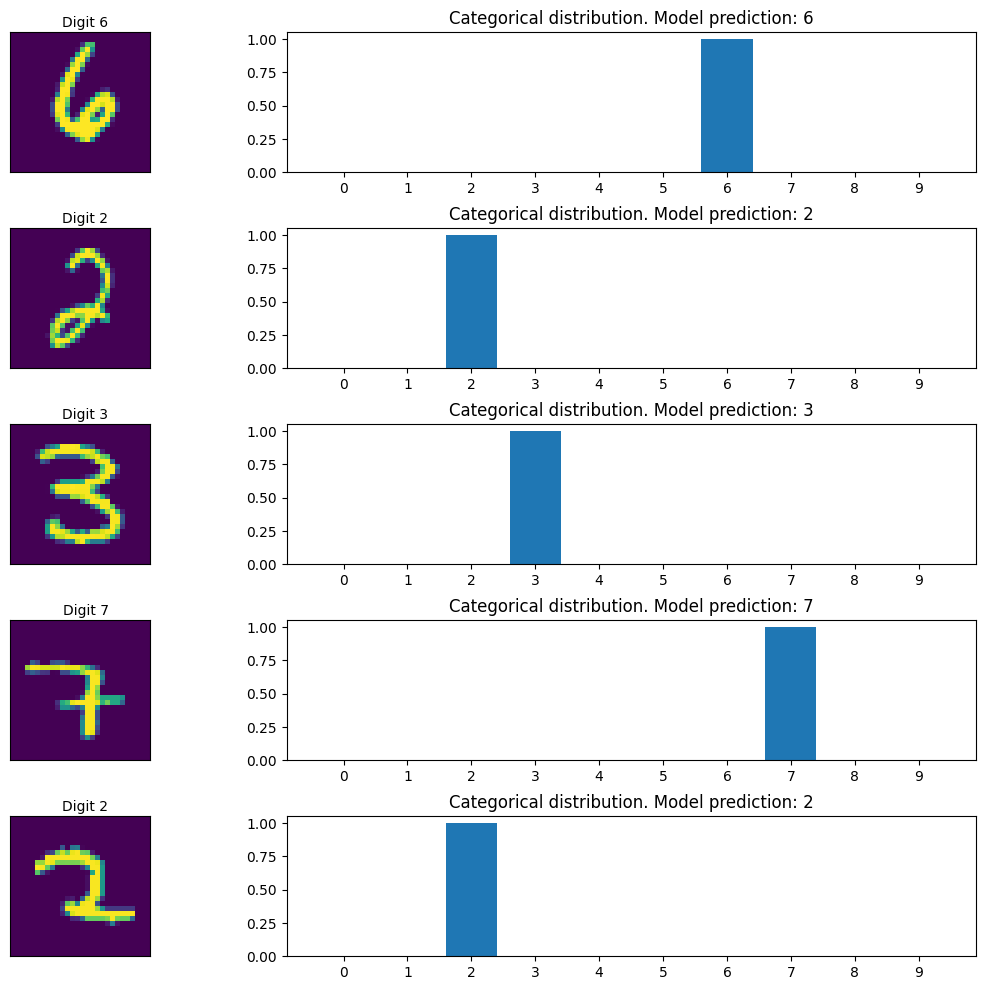

In [ ]:
# YOUR CODE HERE
# 1. Set the random seed
np.random.seed(42)

# 2. Randomly select 5 test images and their corresponding labels
random_indices = np.random.choice(test_images.shape[0], size=5, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

# Get predictions for these images
predictions = predict_from_model(model, random_test_images)

# 3. Plot the images and their predictions
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, gt_label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {gt_label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()


In [ ]:
# Run this cell to get model predictions on randomly selected test images.
predictions = predict_from_model(model, random_test_images)

1/1 [==============================] - 0s 28ms/step


In [ ]:
#Each of the 5 images produces an output of 10 probabilities, giving output shape of (5, 10)
assert(predictions.shape == (5, 10))

Plot the output of the `softmax` function on each random test image

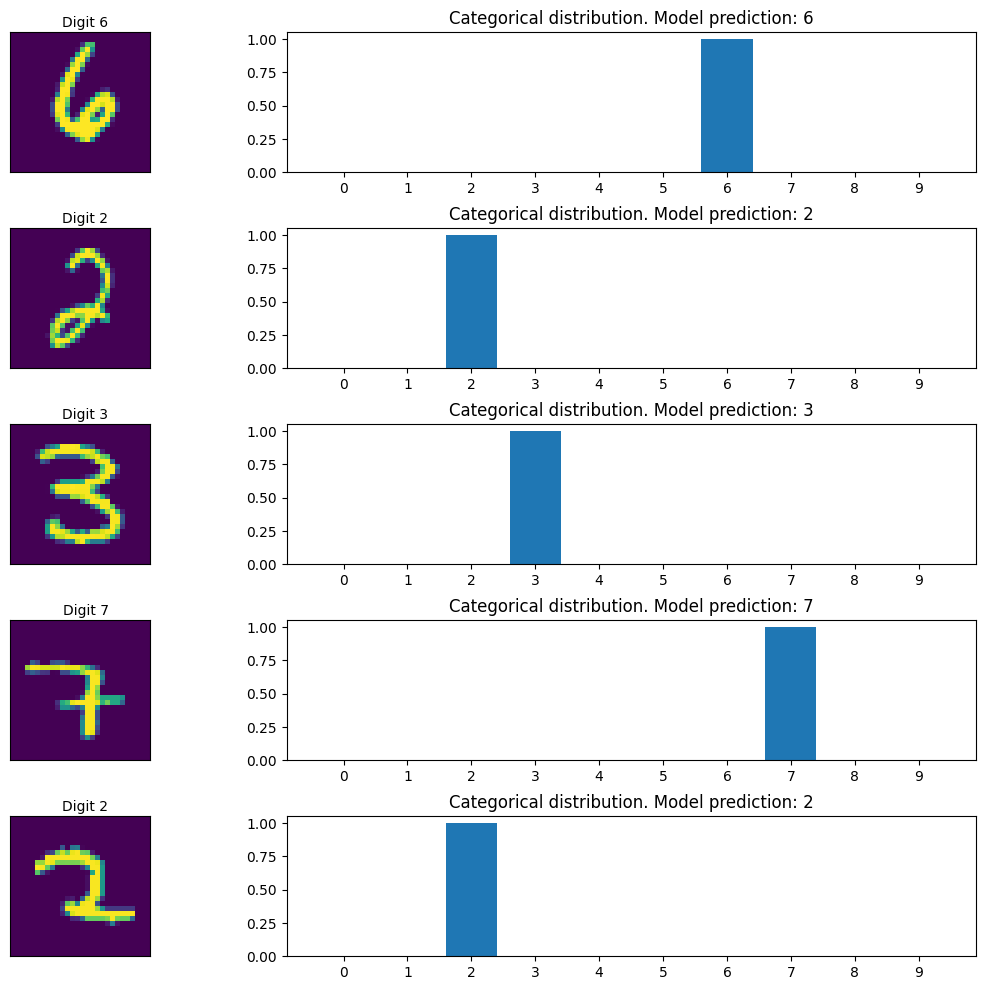

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, gt_label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {gt_label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()

In [ ]:
#Store prediction distribution of the 5th random image
prediction_distribution = predictions[4]

#Determine the ground truth label corresponding to the 5th random image. Store it in variable gt_label.
#Determin the predicted label corresponding to the 5th random image. Store it in variable predicted_label.

# YOUR CODE HERE
# 1. Get the ground truth label for the 5th image
gt_label = random_test_labels[2]

# 2. Get the predicted label for the 5th image
predicted_label = np.argmax(prediction_distribution)


In [ ]:
print(gt_label, predicted_label, prediction_distribution[gt_label], prediction_distribution[predicted_label])

3 2 0.0 1.0


In [ ]:
assert(gt_label == 3)
assert(predicted_label == 3 or predicted_label == 9)
print("All tests passed!")

AssertionError: ignored